# CNN-Daily News Text Summarization

## Part 1 - Preprocessing

Scripts to show python and NLP

In [1]:
import re
import spacy
import html5lib
from bs4 import BeautifulSoup
from urllib import request
import nltk
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
import wordcloud as wc
from gensim.models.phrases import Phrases, Phraser

# from google.colab import drive

# drive.mount('/content/drive')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

# path = "/content/drive/MyDrive/_FACULDADE/7º Semestre/Tópicos VIII/_Final/V2/"
path = ""

# sentence tokenize object
sentences = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alisson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/alisson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/alisson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/alisson/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /home/alisson/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Dealing with web pages

In [3]:
spacy.cli.download("en_core_web_md")  # en_core_web_sm en_core_web_lg
nlp = spacy.load('en_core_web_md')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [1]:
allData = True
treatment = False
wordcloud = False
gridSearch = False
train = False

In [5]:
if allData:
    fTokens = "_25k"
else:
    fTokens = "_1k"

In [6]:
urlData1 = f"https://docs.google.com/spreadsheets/d/1sbp6Y1YZWHILHMma8qphe8tgJvDQ7s_ubLJhY2hSJI8/gviz/tq?tqx=out:csv&sheet=test"
urlData2 = f"https://docs.google.com/spreadsheets/d/1CSIVmE1NKiui-EEEHRnnsXzXmy908mQRtasSmtQe7x8/gviz/tq?tqx=out:csv&sheet=validation"

df1 = pd.read_csv(urlData1)
df2 = pd.read_csv(urlData2)

if allData:
    news = df1.append(df2, ignore_index=True)['article']
else:
    news = df1.append(df2, ignore_index=True)['article'][:1000]
news

0        Ever noticed how plane seats appear to be gett...
1        A drunk teenage boy had to be rescued by secur...
2        Dougie Freedman is on the verge of agreeing a ...
3        Liverpool target Neto is also wanted by PSG an...
4        Bruce Jenner will break his silence in a two-h...
                               ...                        
24853    All shops will be allowed to offer ‘click and ...
24854    Mo Farah has had his nationality called into q...
24855    Wolves kept their promotion hopes alive with a...
24856    A Brown University graduate student  has died ...
24857    As thousands of young Australians look to buy ...
Name: article, Length: 24858, dtype: object

### Removing Blacklist words:

In [7]:
if treatment:
  blackList = ["cnn", "bbc", "(CNN)", '\xad', "abc news", "\u200b", "\u202c",
                "\u202a#", "\u200e", "\u202c", "whyimnotvotingforhillary", "\"\'", "00pm", "042secs", "10", '000', '11', '111th', '112million', '117million', '12th', '130', '130million', '13th', '140billion', '140million', '147notjustanumber', '14billion', '14th', '15', '15am', '15th', '16th', '17', '177billion', '17th', '18', '1800', '180billion', '1850', '1870', '18s', '18th', '19', '1920', '1930', '1940', '1960', '1970', '1980', '1990', '19s', '19th', '20', '2000', '208', '20st', '20th', '21inch', '23rd', '24', '25st', '27', '27pm', '280sl', '2w', '30', '300_missile', '300er', '30am', '30pm', '30th', '31pm', '31st', '33minute', '35million', '363ad', '368million', '377million', '38', '385million', '390million', '39th', '3_contest', '3d', '3lbs', '405nm', '42million', '45min', '47', '49th', '4million', '506million', '50metre', '50pm', '50th', '52pm', '545million', '55s', '59', '5lbs', '5million', '617s', '61ad', '64th', '65th', '669million', '6l', '6lbs', '6music', '765million', '7million', '82pt', '84pt', '85pt', '8lbs', '8mmm', '8mmm_aboriginal', '90', '979pp', '9billion', '00', '09', '0kms', '3_contest', '45pm', '60s', '61', '7sqm']
  blackList = list(map(lambda a: "(?i)" + a, blackList))
  news.replace(blackList, "", inplace=True, regex=True)

  for i in range(len(news)):
      news[i] = re.sub(
          r"((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*", "", news[i])

  news

In [8]:
if treatment:
  dlemma=[]
  for d in news:
    tdoc=nlp(d)
    lm=[" ".join([token.lemma_.lower() for token in tdoc if 
      token.pos_ in ['NOUN','PROPN', 'VERB'] and 
      token.pos_ not in ['TIME', '-PRON-', 'CARDINAL', 'ORDINAL'] and
      token.is_stop == False and 
      token.is_punct == False and 
      token.is_digit == False and 
      len(token.lemma_) > 3])] 
    dlemma.append(lm)
  dlemma

In [9]:
if treatment:
  tokens = []
  for doc in dlemma:
      tokens.append(doc[0].split())
  tokens

In [10]:
if treatment:
  phrases = Phrases(tokens, min_count=2)
  bigram = Phraser(phrases)
  bdocs = [bigram[d] for d in tokens]

  tokens = bdocs

  with open(path+'tokens'+fTokens+'.txt', 'w') as temp_file:
    for row in tokens:
      for index, item in enumerate(row):
        if index == len(row)-1:
          temp_file.write("%s\n" % item)
        else:
          temp_file.write("%s," % item)

### Statistcs

- N of documents
- the shortest one (n of words)
- the longest one (n of words)
- the average size 

In [11]:
file = open(path+'tokens'+fTokens+'.txt', 'r')
lines = file.readlines()
tokens = [i.replace("\n", "").split(",") for i in lines]

n_documents = len(tokens)
shortest = min([len(d) for d in tokens])
largest = max([len(d) for d in tokens])
average = sum([len(d) for d in tokens]) / n_documents

print("number of documents: {}\nshortest: {}\nlargest: {}\naverage: {}".format(n_documents, shortest, largest, average))

number of documents: 24858
shortest: 14
largest: 1047
average: 222.96648966127606


In [12]:
if wordcloud:
  coll = ''
  allTokens = []
  dictionaryOfString = []

  for d in tokens:
    [allTokens.append(w) for w in d]
    collect = ' '.join([w for w in d])
    dictionaryOfString.append(collect)
    coll = coll+' '+collect

  mycloud = wc.WordCloud().generate(coll)
  plt.figure(figsize=(20, 30))
  plt.imshow(mycloud)

  setOfTokens = set(allTokens)

  print("n of words of dictionary: {}\nn of words of collection: {}".format(
    len(setOfTokens), len(allTokens)))

## Part 2 - Creating the Model

Using the saved tokens as `corpus`

In [13]:
corpus = tokens

### Tomotopy

Using Tomotopy to get the topics

In [14]:
!pip install tomotopy
import tomotopy as tp
import numpy as np
ldamodel = tp.LDAModel

Using a type of gridSearch to get the best params (as the professor's example)

# of docs: 24858


/home/alisson/anaconda3/envs/gpu2/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.


K: 200 mcf:  0 mdf:  0 rm: 30 alfa: 0.450 beta: 0.450 coherence: 0.914 Collection  Vocab size: 190618  # of words: 4971359
K: 250 mcf:  0 mdf:  0 rm: 30 alfa: 0.450 beta: 0.450 coherence: 0.926 Collection  Vocab size: 190618  # of words: 4971359
K: 300 mcf:  0 mdf:  0 rm: 30 alfa: 0.450 beta: 0.450 coherence: 0.934 Collection  Vocab size: 190618  # of words: 4971359


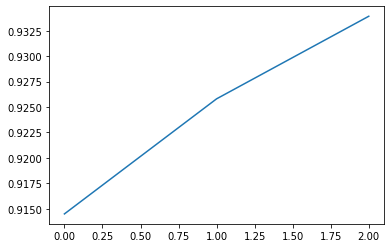

In [15]:
rm_top =[30] #the number of top words to be removed (default 0)
min_df = [0] #minimum document frequency of words (default 0)
min_cf = [0] #minimum collection frequency of words. (default 0)
alphas = [0.45] #hyperparameter of Dirichlet distribution for document-topic (default 0.1)
etas = [0.45]  #hyperparameter of Dirichlet distribution for topic-word (default 0.01)
K=[200,250,300]
if gridSearch:
    cv=[]
    print('# of docs:', len(corpus)) 
    for k in K:
      for mdf in min_df:
        for rm in rm_top:
          for a in alphas: 
            for e in etas:
              for mcf in min_cf:
                #create an object
                #tw term weight IDF (Inverse Document Frequency term weighting), ONE (equal - default), PMI (Use Pointwise Mutual Information term weighting)
                LDA = ldamodel(tw = tp.TermWeight.IDF, 
                               k=k, 
                               alpha = a, 
                               eta = e, 
                               seed = 1,  
                               min_df = mdf, 
                               min_cf = mcf, 
                               rm_top = rm)
                #add documents to it
                for doc in corpus:
                    LDA.add_doc(doc)
                #train
                LDA.train(iter = 500) # iter (# of iterations - default 10) # workers (# of cores to be used - 0 all)
                #get the coherence (c_v)
                coh = tp.coherence.Coherence(LDA, coherence='c_v')
                average_coherence = coh.get_score()
                print('K: %2d mcf: %2d mdf: %2d rm: %2d alfa: %.3f beta: %.3f coherence: %.3f'%(k,mcf,mdf,rm,a,e,average_coherence),end=' Collection ')
                print(' Vocab size:', len(LDA.used_vocabs), ' # of words:', LDA.num_words)
                cv.append(average_coherence)
    plt.plot(cv)
    plt.show
    
# K: 10 mcf:  0 mdf: 10 rm: 50 alfa: 0.100 beta: 0.500 coherence: 0.781 Collection  Vocab size: 26904  # of words: 4134389

In [16]:
print(max(cv))

0.9339194529851275


Creating the model and printing the topics

In [92]:
if train:
    LDA = ldamodel(tw = tp.TermWeight.IDF, k=20, alpha = 0.45 , eta = 0.45, seed = 1,  min_df = 0, min_cf = 0, rm_top = 30)
    #add documents to it
    for doc in corpus:
        LDA.add_doc(doc)
    #train
    LDA.train(iter = 500) # iter (# of iterations - default 10) # workers (# of cores to be used - 0 all)
    LDA.save('LDA_model'+fTokens+'.bin')


LDA = ldamodel.load('LDA_model'+fTokens+'.bin')
for i in range(20):
    print("Topic", i, end=' => ')
    for w in LDA.get_topic_words(i):
        print(w[0], end=" ")
    print()

/home/alisson/anaconda3/envs/gpu2/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  import sys


Topic 0 => fight film mayweather pacquiao actor star movie song manny_pacquiao floyd_mayweather 
Topic 1 => user device apple google company technology mcilroy robot phone launch 
Topic 2 => iran hamilton yemen race israel netanyahu eclipse rosberg u.s. ferrari 
Topic 3 => officer scott gray ferguson shoot police_officer shooting protester arrest church 
Topic 4 => isis islamic_state attack syria group soldier iraq kill militant fighter 
Topic 5 => animal water bird china elephant fish area snow island weather 
Topic 6 => season club chelsea goal liverpool arsenal premier_league united manchester_united champions_league 
Topic 7 => england ireland rugby ball score match wales scotland season minute 
Topic 8 => food scientist water earth researcher study product planet surface research 
Topic 9 => patient doctor cancer hospital treatment surgery disease health durst drug 
Topic 10 => plane flight passenger pilot aircraft airport airline ship crash boat 
Topic 11 => dress model wear love

There some topics that can be the same, for example topics of sports or crimes.

## Part 3 - Labeling the topics

In [93]:
# extract candidates for auto topic labeling
extractor = tp.label.PMIExtractor(min_cf=10, min_df=5, max_len=5, max_cand=10000)
cands = extractor.extract(LDA)

# ranking the candidates of labels for a specific topic
labeler = tp.label.FoRelevance(LDA, cands, min_df=5, smoothing=1e-2, mu=0.25)
for k in range(LDA.k):
    print("== Topic #{} ==".format(k))
    print("Labels:", ', '.join(label for label, score in labeler.get_topic_labels(k, top_n=5)))
    for word, prob in LDA.get_topic_words(k, top_n=5):
        print(word, prob, sep='\t')
    print()

== Topic #0 ==
Labels: mandalay_hotel, mayweather_boxing club, coliseum, algieri, visitors
fight	0.0042142621241509914
film	0.004207087680697441
mayweather	0.0032339761964976788
pacquiao	0.0031473450362682343
actor	0.0024777438957244158

== Topic #1 ==
Labels: currys_world, security researcher, qualcomm, augment_reality, fitbit
user	0.0046275919303298
device	0.003680596826598048
apple	0.0036390458699315786
google	0.003227432258427143
company	0.0028463548514992

== Topic #2 ==
Labels: rubble_house, city_taiz, mark_webber, lifting_sanction, iran power
iran	0.007588318549096584
hamilton	0.00606050668284297
yemen	0.004897256847470999
race	0.003961627837270498
israel	0.0038737833965569735

== Topic #3 ==
Labels: police misconduct, officer shoot brown, attorney_gray family, bystander_video, attorney_gray
officer	0.004962154198437929
scott	0.0029210562352091074
gray	0.002745906123891473
ferguson	0.002468211343511939
shoot	0.0023828211706131697

== Topic #4 ==
Labels: militant, isis, islamic_s

Topic names

In [128]:
topic_names = [
    "culture and entertainment",
    "science and technology",
    "race",
    "military and police",
    "war/terrorism",
    "nature/environment",
    "soccer",
    "rugby",
    "agriculture/food",
    "medicine/disease",
    "plane/space",
    "fashion/pop",
    "british politics",
    "family",
    "murder",
    "crime, law and justice",
    "cricket",
    "US policy",
    "drugs and trafficking",
    "construction, architecture and house"
]

Getting the doc's topic:

In [129]:
threshold = 0.3
docs_topics = []
occurrences = []
for index,doc in enumerate(LDA.docs):
    aux = []
    for i in doc.get_topics(top_n=10):
        if i[1] >= threshold:
            aux.append((topic_names[i[0]], i[1]))
            occurrences.append(i[0])
    if len(aux) == 0:
        aux.append(doc.get_topics(top_n=1)[0])
    docs_topics.append(aux)

for index, topic in enumerate(docs_topics):
    print("Document #{} \t| Topics: {}".format(index, topic))

Document #0 	| Topics: [('plane/space', 0.8643683195114136)]
Document #1 	| Topics: [('nature/environment', 0.5396555662155151), ('crime, law and justice', 0.4599493741989136)]
Document #2 	| Topics: [('rugby', 0.9989571571350098)]
Document #3 	| Topics: [('soccer', 0.9996223449707031)]
Document #4 	| Topics: [('fashion/pop', 0.7829537987709045)]
Document #5 	| Topics: [('plane/space', 0.3702104389667511), ('nature/environment', 0.32209154963493347), ('construction, architecture and house', 0.30743950605392456)]
Document #6 	| Topics: [('science and technology', 0.5459253191947937), ('british politics', 0.45376986265182495)]
Document #7 	| Topics: [('culture and entertainment', 0.894214391708374)]
Document #8 	| Topics: [('drugs and trafficking', 0.5812666416168213), ('rugby', 0.41852468252182007)]
Document #9 	| Topics: [('crime, law and justice', 0.9940316081047058)]
Document #10 	| Topics: [('plane/space', 0.9010658860206604)]
Document #11 	| Topics: [('drugs and trafficking', 0.803

Document #1866 	| Topics: [('murder', 0.9730139970779419)]
Document #1867 	| Topics: [('soccer', 0.9994049072265625)]
Document #1868 	| Topics: [('agriculture/food', 0.754813551902771)]
Document #1869 	| Topics: [('culture and entertainment', 0.7081611156463623)]
Document #1870 	| Topics: [('medicine/disease', 0.6483740210533142)]
Document #1871 	| Topics: [('murder', 0.7611202001571655)]
Document #1872 	| Topics: [('military and police', 0.9997835159301758)]
Document #1873 	| Topics: [('fashion/pop', 0.7507190108299255)]
Document #1874 	| Topics: [('war/terrorism', 0.7086603045463562)]
Document #1875 	| Topics: [('family', 0.41454657912254333)]
Document #1876 	| Topics: [('US policy', 0.5139172077178955)]
Document #1877 	| Topics: [('military and police', 0.5066289305686951), ('nature/environment', 0.38551008701324463)]
Document #1878 	| Topics: [('culture and entertainment', 0.7603557109832764)]
Document #1879 	| Topics: [('soccer', 0.9995764493942261)]
Document #1880 	| Topics: [('m

Document #3663 	| Topics: [('war/terrorism', 0.7701443433761597)]
Document #3664 	| Topics: [('family', 0.9998422861099243)]
Document #3665 	| Topics: [('nature/environment', 0.7195107340812683)]
Document #3666 	| Topics: [('family', 0.9998005628585815)]
Document #3667 	| Topics: [('cricket', 0.999647855758667)]
Document #3668 	| Topics: [('fashion/pop', 0.999764621257782)]
Document #3669 	| Topics: [('soccer', 0.9995616674423218)]
Document #3670 	| Topics: [('family', 0.6218688488006592)]
Document #3671 	| Topics: [('soccer', 0.9990955591201782)]
Document #3672 	| Topics: [('cricket', 0.9997416138648987)]
Document #3673 	| Topics: [('medicine/disease', 0.6505770087242126)]
Document #3674 	| Topics: [('british politics', 0.6660375595092773)]
Document #3675 	| Topics: [('soccer', 0.999414324760437)]
Document #3676 	| Topics: [('agriculture/food', 0.5070058107376099)]
Document #3677 	| Topics: [('soccer', 0.6602084040641785), ('medicine/disease', 0.339679092168808)]
Document #3678 	| Top

Document #5376 	| Topics: [('race', 0.995207667350769)]
Document #5377 	| Topics: [('agriculture/food', 0.9634248614311218)]
Document #5378 	| Topics: [('murder', 0.4742363691329956), ('medicine/disease', 0.45476579666137695)]
Document #5379 	| Topics: [('soccer', 0.9999063611030579)]
Document #5380 	| Topics: [('plane/space', 0.9994518756866455)]
Document #5381 	| Topics: [('soccer', 0.9995489716529846)]
Document #5382 	| Topics: [('construction, architecture and house', 0.7475997805595398)]
Document #5383 	| Topics: [('race', 0.5336971282958984), ('nature/environment', 0.396710067987442)]
Document #5384 	| Topics: [('plane/space', 0.9194126725196838)]
Document #5385 	| Topics: [('science and technology', 0.9113642573356628)]
Document #5386 	| Topics: [('race', 0.5976003408432007), ('war/terrorism', 0.40227457880973816)]
Document #5387 	| Topics: [('construction, architecture and house', 0.8815348148345947)]
Document #5388 	| Topics: [('cricket', 0.9993525147438049)]
Document #5389 	|

Document #7366 	| Topics: [('rugby', 0.8158693909645081)]
Document #7367 	| Topics: [('murder', 0.9996713399887085)]
Document #7368 	| Topics: [('soccer', 0.4870516061782837)]
Document #7369 	| Topics: [('nature/environment', 0.4791792035102844), ('science and technology', 0.32764932513237)]
Document #7370 	| Topics: [('science and technology', 0.65789794921875), ('nature/environment', 0.33817043900489807)]
Document #7371 	| Topics: [('agriculture/food', 0.5976340174674988), ('fashion/pop', 0.351147323846817)]
Document #7372 	| Topics: [('agriculture/food', 0.8693559169769287)]
Document #7373 	| Topics: [('nature/environment', 0.9996744394302368)]
Document #7374 	| Topics: [('murder', 0.5727747082710266), ('fashion/pop', 0.37803587317466736)]
Document #7375 	| Topics: [('agriculture/food', 0.8343319296836853)]
Document #7376 	| Topics: [('soccer', 0.9996776580810547)]
Document #7377 	| Topics: [('plane/space', 0.5103611946105957), ('family', 0.3139428198337555)]
Document #7378 	| Topic

Document #8734 	| Topics: [('british politics', 0.6081066727638245)]
Document #8735 	| Topics: [('culture and entertainment', 0.5236782431602478)]
Document #8736 	| Topics: [('war/terrorism', 0.6238850951194763)]
Document #8737 	| Topics: [('soccer', 0.7163563370704651)]
Document #8738 	| Topics: [('soccer', 0.9994536638259888)]
Document #8739 	| Topics: [('soccer', 0.9232637882232666)]
Document #8740 	| Topics: [('fashion/pop', 0.9061238765716553)]
Document #8741 	| Topics: [('medicine/disease', 0.8562709093093872)]
Document #8742 	| Topics: [('murder', 0.9996771812438965)]
Document #8743 	| Topics: [('crime, law and justice', 0.9666589498519897)]
Document #8744 	| Topics: [('science and technology', 0.999809741973877)]
Document #8745 	| Topics: [('nature/environment', 0.8644229173660278)]
Document #8746 	| Topics: [('war/terrorism', 0.7827012538909912)]
Document #8747 	| Topics: [('race', 0.9997760057449341)]
Document #8748 	| Topics: [('soccer', 0.8919203281402588)]
Document #8749 	

Document #10552 	| Topics: [('culture and entertainment', 0.999676525592804)]
Document #10553 	| Topics: [('fashion/pop', 0.6238627433776855), ('murder', 0.375882089138031)]
Document #10554 	| Topics: [('soccer', 0.9999237656593323)]
Document #10555 	| Topics: [('war/terrorism', 0.5456349849700928), ('murder', 0.3574952185153961)]
Document #10556 	| Topics: [('medicine/disease', 0.785007894039154)]
Document #10557 	| Topics: [('family', 0.9995916485786438)]
Document #10558 	| Topics: [('soccer', 0.9997451305389404)]
Document #10559 	| Topics: [('cricket', 0.49764370918273926), ('family', 0.42259418964385986)]
Document #10560 	| Topics: [('fashion/pop', 0.8096112608909607)]
Document #10561 	| Topics: [('nature/environment', 0.948037326335907)]
Document #10562 	| Topics: [('race', 0.7043635249137878)]
Document #10563 	| Topics: [('plane/space', 0.41908642649650574)]
Document #10564 	| Topics: [('military and police', 0.4401153326034546), ('war/terrorism', 0.4386208951473236)]
Document #1

Document #12535 	| Topics: [('soccer', 0.60030597448349)]
Document #12536 	| Topics: [('nature/environment', 0.8490636944770813)]
Document #12537 	| Topics: [('crime, law and justice', 0.7329531908035278)]
Document #12538 	| Topics: [('science and technology', 0.6100155711174011), ('nature/environment', 0.3898638188838959)]
Document #12539 	| Topics: [('culture and entertainment', 0.9997050166130066)]
Document #12540 	| Topics: [('construction, architecture and house', 0.9593040943145752)]
Document #12541 	| Topics: [('US policy', 0.9997820258140564)]
Document #12542 	| Topics: [('crime, law and justice', 0.7301888465881348)]
Document #12543 	| Topics: [('science and technology', 0.5074859857559204), ('murder', 0.49233466386795044)]
Document #12544 	| Topics: [('soccer', 0.9993727803230286)]
Document #12545 	| Topics: [('fashion/pop', 0.5205812454223633), ('plane/space', 0.4793449640274048)]
Document #12546 	| Topics: [('murder', 0.996527373790741)]
Document #12547 	| Topics: [('US pol

Document #14590 	| Topics: [('race', 0.9963638782501221)]
Document #14591 	| Topics: [('nature/environment', 0.99980628490448)]
Document #14592 	| Topics: [('war/terrorism', 0.7489480972290039)]
Document #14593 	| Topics: [('family', 0.9399506449699402)]
Document #14594 	| Topics: [('family', 0.5787099003791809), ('fashion/pop', 0.3007354736328125)]
Document #14595 	| Topics: [('murder', 0.51567143201828), ('nature/environment', 0.484055757522583)]
Document #14596 	| Topics: [('murder', 0.9998224973678589)]
Document #14597 	| Topics: [('soccer', 0.9898003935813904)]
Document #14598 	| Topics: [('british politics', 0.7271520495414734)]
Document #14599 	| Topics: [('culture and entertainment', 0.9996938705444336)]
Document #14600 	| Topics: [('murder', 0.9998931288719177)]
Document #14601 	| Topics: [('soccer', 0.9995360374450684)]
Document #14602 	| Topics: [('fashion/pop', 0.8950895071029663)]
Document #14603 	| Topics: [('british politics', 0.9998587369918823)]
Document #14604 	| Topi

Document #16008 	| Topics: [('medicine/disease', 0.6136578321456909), ('US policy', 0.38590630888938904)]
Document #16009 	| Topics: [('soccer', 0.9997747540473938)]
Document #16010 	| Topics: [('british politics', 0.6106327772140503), ('construction, architecture and house', 0.38908621668815613)]
Document #16011 	| Topics: [('soccer', 0.999676525592804)]
Document #16012 	| Topics: [('culture and entertainment', 0.9996117353439331)]
Document #16013 	| Topics: [('construction, architecture and house', 0.7724996209144592)]
Document #16014 	| Topics: [('culture and entertainment', 0.5035915970802307), ('soccer', 0.4767594337463379)]
Document #16015 	| Topics: [('science and technology', 0.41377148032188416), ('plane/space', 0.3332451581954956)]
Document #16016 	| Topics: [('crime, law and justice', 0.8941577672958374)]
Document #16017 	| Topics: [('plane/space', 0.40740710496902466)]
Document #16018 	| Topics: [('military and police', 0.5113196969032288), ('medicine/disease', 0.4885192811

Document #17930 	| Topics: [('construction, architecture and house', 0.7050686478614807)]
Document #17931 	| Topics: [('murder', 0.7806420922279358)]
Document #17932 	| Topics: [('US policy', 0.8552355766296387)]
Document #17933 	| Topics: [('agriculture/food', 0.6278715133666992), ('medicine/disease', 0.3719905614852905)]
Document #17934 	| Topics: [('nature/environment', 0.9997349381446838)]
Document #17935 	| Topics: [('US policy', 0.6287969350814819), ('medicine/disease', 0.31468477845191956)]
Document #17936 	| Topics: [('british politics', 0.9998288154602051)]
Document #17937 	| Topics: [('rugby', 0.9851044416427612)]
Document #17938 	| Topics: [('military and police', 0.9999014735221863)]
Document #17939 	| Topics: [('construction, architecture and house', 0.7847842574119568)]
Document #17940 	| Topics: [('family', 0.560658872127533)]
Document #17941 	| Topics: [('soccer', 0.928710401058197)]
Document #17942 	| Topics: [('science and technology', 0.5211731195449829), ('nature/en

Document #19835 	| Topics: [('plane/space', 0.7130628824234009)]
Document #19836 	| Topics: [('medicine/disease', 0.8193172812461853)]
Document #19837 	| Topics: [('soccer', 0.9997221231460571)]
Document #19838 	| Topics: [('crime, law and justice', 0.8877309560775757)]
Document #19839 	| Topics: [('military and police', 0.7895314693450928)]
Document #19840 	| Topics: [('military and police', 0.5834149122238159)]
Document #19841 	| Topics: [('soccer', 0.8843955993652344)]
Document #19842 	| Topics: [('nature/environment', 0.5552156567573547), ('US policy', 0.4446529448032379)]
Document #19843 	| Topics: [('rugby', 0.9016653895378113)]
Document #19844 	| Topics: [('science and technology', 0.9065448045730591)]
Document #19845 	| Topics: [('british politics', 0.9998633861541748)]
Document #19846 	| Topics: [('soccer', 0.999742865562439)]
Document #19847 	| Topics: [('construction, architecture and house', 0.6925032734870911)]
Document #19848 	| Topics: [('rugby', 0.9998049736022949)]
Doc

Document #21509 	| Topics: [('medicine/disease', 0.9997337460517883)]
Document #21510 	| Topics: [('british politics', 0.9145369529724121)]
Document #21511 	| Topics: [('crime, law and justice', 0.6029112935066223), ('US policy', 0.39685216546058655)]
Document #21512 	| Topics: [('culture and entertainment', 0.9173877835273743)]
Document #21513 	| Topics: [('soccer', 0.9998164176940918)]
Document #21514 	| Topics: [('crime, law and justice', 0.728976309299469)]
Document #21515 	| Topics: [('family', 0.9998885989189148)]
Document #21516 	| Topics: [('US policy', 0.8038501739501953)]
Document #21517 	| Topics: [('construction, architecture and house', 0.8619431257247925)]
Document #21518 	| Topics: [('soccer', 0.9939038753509521)]
Document #21519 	| Topics: [('war/terrorism', 0.9999043941497803)]
Document #21520 	| Topics: [('murder', 0.9998562932014465)]
Document #21521 	| Topics: [('US policy', 0.6515576839447021), ('military and police', 0.34828221797943115)]
Document #21522 	| Topics

Document #23224 	| Topics: [('british politics', 0.9998196363449097)]
Document #23225 	| Topics: [('agriculture/food', 0.4749622046947479), ('nature/environment', 0.34551554918289185)]
Document #23226 	| Topics: [('science and technology', 0.7730603218078613)]
Document #23227 	| Topics: [('drugs and trafficking', 0.7426544427871704)]
Document #23228 	| Topics: [('nature/environment', 0.9923620223999023)]
Document #23229 	| Topics: [('fashion/pop', 0.3743506073951721)]
Document #23230 	| Topics: [('US policy', 0.9995930194854736)]
Document #23231 	| Topics: [('culture and entertainment', 0.718971312046051)]
Document #23232 	| Topics: [('british politics', 0.9998376965522766)]
Document #23233 	| Topics: [('nature/environment', 0.48935166001319885)]
Document #23234 	| Topics: [('rugby', 0.9996614456176758)]
Document #23235 	| Topics: [('agriculture/food', 0.6932423114776611), ('british politics', 0.30650341510772705)]
Document #23236 	| Topics: [('fashion/pop', 0.6460148096084595)]
Docume

### Top 10 Hottest Topics

<AxesSubplot:title={'center':'Top 10 Hottest Topics'}>

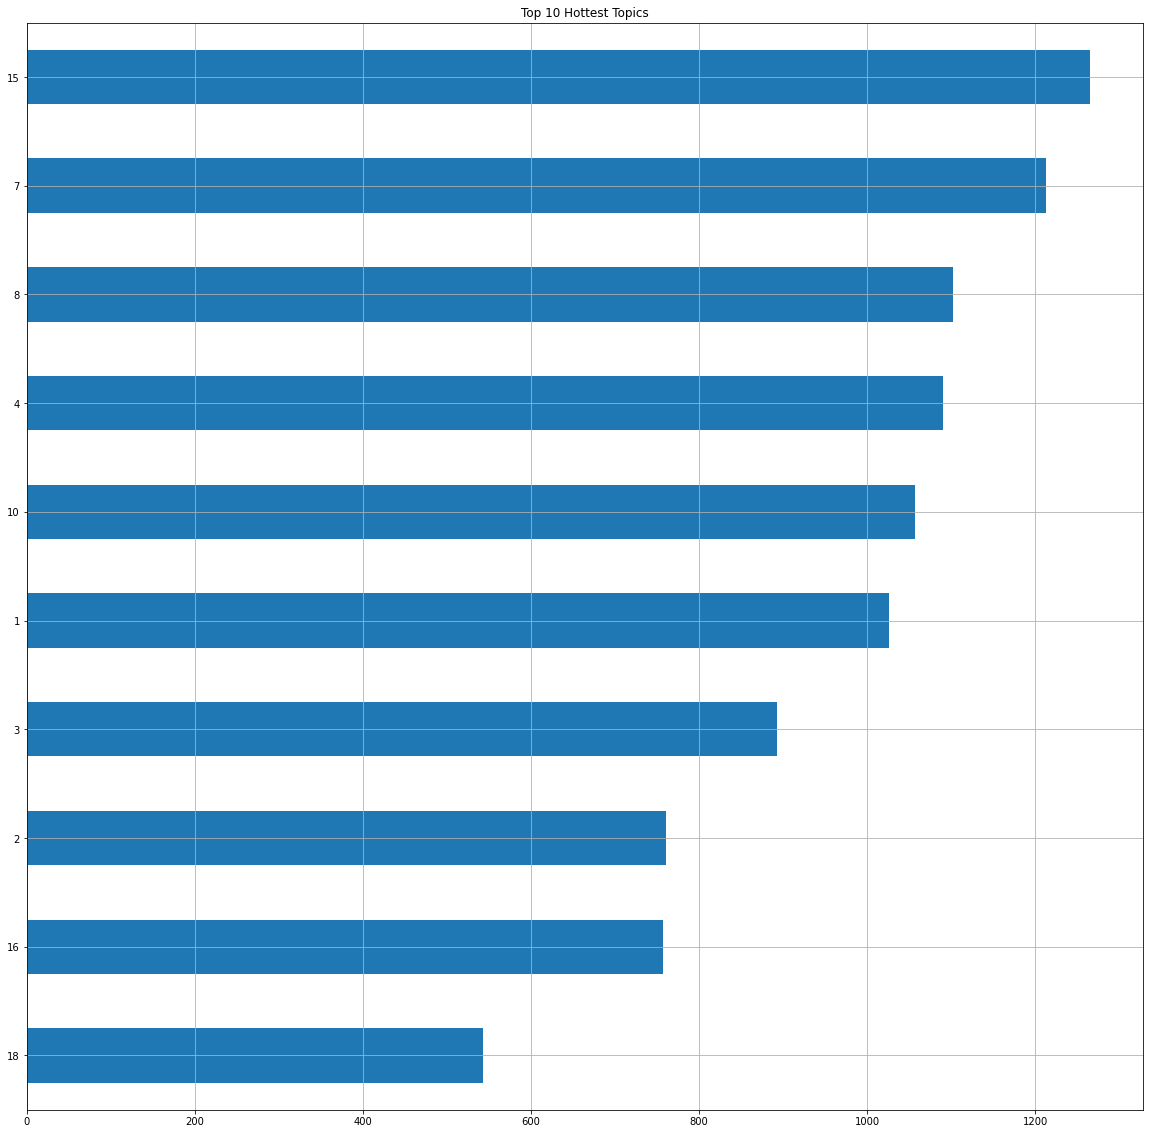

In [130]:
counts = pd.Series(occurrences).value_counts().sort_values()[:10]
counts.plot(kind = 'barh', figsize=(20,20), title="Top 10 Hottest Topics", grid=True)

In [131]:
i = 1
for value,index in zip(counts.sort_values(ascending=False), counts.sort_values(ascending=False).index):
    print('#{} : Topic {}\t- {} | number of occurrences: {}'.format(i, index, topic_names[index],value))
    if i == 10: break
    i+=1

#1 : Topic 15	- crime, law and justice | number of occurrences: 1265
#2 : Topic 7	- rugby | number of occurrences: 1213
#3 : Topic 8	- agriculture/food | number of occurrences: 1102
#4 : Topic 4	- war/terrorism | number of occurrences: 1090
#5 : Topic 10	- plane/space | number of occurrences: 1057
#6 : Topic 1	- science and technology | number of occurrences: 1026
#7 : Topic 3	- military and police | number of occurrences: 893
#8 : Topic 2	- race | number of occurrences: 761
#9 : Topic 16	- cricket | number of occurrences: 757
#10 : Topic 18	- drugs and trafficking | number of occurrences: 543


In [132]:
def searchTopic(lTopics, idToFind=""):
    ret = list(filter(lambda x: (x[0] == idToFind), lTopics))
    return ret if len(ret) > 0 else None


list1 = pd.Series(list(map(searchTopic, docs_topics)))

list1.dropna()

Series([], dtype: object)

In [133]:
print(news[99])

(CNN)You know the phrase "dodging a bullet"? Forget about it. Probably not going to happen anymore. The U.S. military said this week it has made great progress in its effort to develop a self-steering bullet. In February, the "smart bullets" -- .50-caliber projectiles equipped with optical sensors -- passed their most successful round of live-fire tests to date, according to the Defense Advanced Research Projects Agency, or DARPA. In the tests, an experienced marksman "repeatedly hit moving and evading targets," a DARPA statement said. "Additionally," the statement said, "a novice shooter using the system for the first time hit a moving target." In other words, now you don't even have to be a good shot to hit the mark. The system has been developed by DARPA's Extreme Accuracy Tasked Ordnance program, known as EXACTO. "True to DARPA's mission, EXACTO has demonstrated what was once thought impossible: the continuous guidance of a small-caliber bullet to target," said Jerome Dunn, DARPA p